In [ ]:
!pip install datasets>=2.6.1
!pip install git+https://github.com/huggingface/transformers
!pip install librosa
!pip install evaluate>=0.30
!pip install jiwer
!pip install gradio
!pip install -q bitsandbytes datasets accelerate loralib
!pip install transformers==4.45.2
!pip install peft
!pip install matplotlib
!pip install tensorboard

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-uzr9kh9h
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-uzr9kh9h
  Resolved https://github.com/huggingface/transformers to commit 6daa3eeba582facb57cd71db8efb66998b12942f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 146.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.3 MB/s eta 0:00

In [ ]:
# -------------------Set model properties-----------------------------------
model_name_or_path = "openai/whisper-small"
language = "telugu"
task = "transcribe"

In [ ]:
#---------------------------Load Dataset--------------------------------------
from datasets import load_dataset, DatasetDict

# Load the full dataset
full_train = load_dataset("raghavab/telugu-asr-small", split="train")
full_test = load_dataset("raghavab/telugu-asr-small", split="test")



# Get dataset sizes
train_size = len(full_train)
test_size = len(full_test)

# Compute the original train-test ratio
original_ratio = test_size / train_size

# Compute the new test size corresponding to 60% train size
new_train_size = int(1 * train_size)
new_test_size = int(1 * test_size)

train_sample = full_train.shuffle(seed=42).select(range(new_train_size))
test_sample = full_test.shuffle(seed=42).select(range(new_test_size))

# Create a new dataset dictionary
bangla_dataset = DatasetDict({
    "train": train_sample,
    "test": test_sample
})


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/430 [00:00<?, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/313M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/309M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/315M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/200M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3113 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/668 [00:00<?, ? examples/s]

In [ ]:
#-----------Check dataset shape----------
bangla_dataset.shape

{'train': (3113, 2), 'test': (668, 2)}

In [ ]:
#-----------Check dataset structure----------
bangla_dataset

DatasetDict({
    train: Dataset({
        features: ['audio', 'transcript'],
        num_rows: 3113
    })
    test: Dataset({
        features: ['audio', 'transcript'],
        num_rows: 668
    })
})

In [ ]:
from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained(model_name_or_path,language=language,task=task)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [ ]:
from transformers import WhisperTokenizer

tokenizer = WhisperTokenizer.from_pretrained(model_name_or_path,language=language,task=task)

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

In [ ]:
from transformers import WhisperProcessor

processor = WhisperProcessor.from_pretrained(model_name_or_path, language=language, task=task)

In [ ]:
from transformers import WhisperForConditionalGeneration

model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small").to('cuda')

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

In [ ]:
#-------------------Check sampling rate before downsampling-----------------
print(bangla_dataset["train"][16])

{'audio': {'path': None, 'array': array([ 0.00039673,  0.00036621,  0.00030518, ..., -0.00012207,
       -0.00015259, -0.00021362]), 'sampling_rate': 48000}, 'transcript': 'వేర్లు దుంపలుగా నుండును'}


In [ ]:
#--------------------Downsample to 16 KHz--------------------------
from datasets import Audio

bangla_dataset = bangla_dataset.cast_column("audio", Audio(sampling_rate=16000))

In [ ]:
#-------------------Check sampling rate after downsampling-----------------
print(bangla_dataset["train"][0])

{'audio': {'path': None, 'array': array([-2.24399584e-04, -3.61349492e-04, -3.22890934e-04, ...,
       -7.33510751e-05,  1.43645535e-04,  0.00000000e+00]), 'sampling_rate': 16000}, 'transcript': 'అతన్ని తన సహాయకునిగా పెట్టుకున్నాడు'}


In [ ]:
#------------------Custom preprocessing function for dataset-----------------------------
def prepare_dataset(batch):
    # load and resample audio data from 48 to 16kHz
    audio = batch["audio"]

    # compute log-Mel input features from input audio array
    batch["input_features"] = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"]).input_features[0]

    # encode target text to label ids
    batch["labels"] = tokenizer(batch["transcript"]).input_ids
    return batch


In [ ]:
#-------------------------Execute preprocessing---------------------------
bangla_dataset = bangla_dataset.map(prepare_dataset, remove_columns=bangla_dataset.column_names["train"], num_proc=1)


Map:   0%|          | 0/3113 [00:00<?, ? examples/s]

Map:   0%|          | 0/668 [00:00<?, ? examples/s]

In [ ]:
#--------------check dataset structure after preprocessing------------
bangla_dataset["test"]

Dataset({
    features: ['input_features', 'labels'],
    num_rows: 668
})

In [ ]:
#--------------check dataset structure after preprocessing------------
bangla_dataset["train"]

Dataset({
    features: ['input_features', 'labels'],
    num_rows: 3113
})

In [ ]:
#-------------------Check first sentence by decoding-----------------------
first_label_ids = bangla_dataset["train"][0]["labels"]  # Get the first label (token IDs)
first_sentence = tokenizer.decode(first_label_ids)  # Decode to text

print(first_sentence)


<|startoftranscript|><|te|><|transcribe|><|notimestamps|>అతన్ని తన సహాయకునిగా పెట్టుకున్నాడు<|endoftext|>


In [ ]:
# -----------------------------Visualization of sentence token sizes vs frequency------------------------
import matplotlib.pyplot as plt

list_of_transcription_lengths = []

# Extract labels from dataset and compute their lengths
for data in bangla_dataset["train"]:
    list_of_transcription_lengths.append(len(data["labels"]))

# Plot the histogram
plt.hist(list_of_transcription_lengths, bins=50)  # Adjust bins for better visualization
plt.xlabel("Sentence Length (Number of Tokens)")
plt.ylabel("Number of Transcripts")
plt.title("Distribution of Transcription Lengths")
plt.show()


In [ ]:
#------------------------------Check true vs prediction on few sentences before fine-tuning------------------
import torch

for idx in range(7,10):
    # Get the tokenized target labels
    target_tokenized = bangla_dataset["train"][idx]["labels"]

    # Decode the true text from tokenized format
    target_text = tokenizer.decode(target_tokenized, skip_special_tokens=True)

    # Convert input features to tensor and add batch dimension
    input_feature = torch.tensor(bangla_dataset["train"][idx]["input_features"]).unsqueeze(0)

    # Ensure correct data type and move to GPU
    input_feature = input_feature.to(dtype=torch.float32, device='cuda')  # Use float16 if needed

    with torch.no_grad():
        op = model.generate(input_feature, language='telugu', task='transcribe')

    # Decode predicted text
    text_pred = tokenizer.batch_decode(op, skip_special_tokens=True)[0]

    print(f'-------{idx}------')
    print(f'True : {target_text} \nPred : {text_pred}')
    print('\n ')


You have passed task=transcribe, but also have set `forced_decoder_ids` to [[1, None], [2, 50359]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of task=transcribe.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


-------7------
True : అనగా మన దేశానికి హిందీ అధికార భాష\n 
Pred :  अनगा मन देसानके हिंदी अदिखार भाशा

 
-------8------
True : ఈ సందర్భంలో ఒక కథ చెప్తాను 
Pred :  इस अंदर्बम लोग के कत चप्तानु

 
-------9------
True : జానకి రచన జి 
Pred :  जानकी रच्चना जी

 


In [ ]:
#-------------------------------------Define Data Collator to introduce padding-------------------------------
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        # if bos token is appended in previous tokenization step,
        # cut bos token here as it's append later anyways
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch

In [ ]:
#----------------------------Load Data Collator-----------------------------
data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

In [ ]:
#------------------------Define evaluation metric wer------------------------
import evaluate
wer = evaluate.load("wer")

In [ ]:
#===================================Custom Evaluation Function for WER Metric with Periodic Plotting===================================
import torch
import pickle
from tqdm import tqdm
import evaluate
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

wer = evaluate.load("wer")
SAVE_PATH = "evaluation_progress.pkl"

def save_progress(progress):
    with open(SAVE_PATH, "wb") as f:
        pickle.dump(progress, f)

def load_progress():
    try:
        with open(SAVE_PATH, "rb") as f:
            return pickle.load(f)
    except FileNotFoundError:
        return {"predictions": [], "references": [], "processed_batches": 0, "wer_history": [], "batch_history": []}

def plot_wer(batch_history, wer_history):
    clear_output(wait=True)
    plt.figure(figsize=(10, 4))
    plt.plot(batch_history, wer_history, marker='o', label='WER (%)')
    plt.xlabel('Batches Processed')
    plt.ylabel('WER')
    plt.title('Running WER Evaluation')
    plt.grid(True)
    plt.legend()
    # Set ticks at intervals of 25 starting from 0 to max batch
    max_batch = max(batch_history) if batch_history else 0
    plt.xticks(np.arange(0, max_batch + 1, 25))
    display(plt.gcf())
    plt.close()

def evaluation(model, resume=False):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    test_dataset = bangla_dataset["test"]
    test_dataloader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=8,
        shuffle=False,
        collate_fn=data_collator
    )

    model.eval()

    # Load previous progress if resuming
    progress = load_progress() if resume else {"predictions": [], "references": [], "processed_batches": 0, "wer_history": [], "batch_history": []}
    predictions, references = progress["predictions"], progress["references"]
    start_batch = progress["processed_batches"]
    wer_history = progress.get("wer_history", [])
    batch_history = progress.get("batch_history", [])

    for batch_idx, batch in enumerate(tqdm(test_dataloader, total=len(test_dataloader))):
        if batch_idx < start_batch:
            continue  # Skip already processed batches

        input_features = batch["input_features"].to(device)
        labels = batch["labels"]

        with torch.no_grad():
            generated_tokens = model.generate(input_features=input_features, language='telugu', task='transcribe')

        decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
        decoded_labels = tokenizer.batch_decode(labels.tolist(), skip_special_tokens=True)

        predictions.extend(decoded_preds)
        references.extend(decoded_labels)

        is_final = (batch_idx == len(test_dataloader) - 1)
        if (batch_idx + 1) % 25 == 0 or is_final:
            current_wer = wer.compute(predictions=predictions, references=references) * 100
            wer_history.append(current_wer)
            batch_history.append(batch_idx + 1)
            plot_wer(batch_history, wer_history)
            save_progress({
                "predictions": predictions,
                "references": references,
                "processed_batches": batch_idx + 1,
                "wer_history": wer_history,
                "batch_history": batch_history
            })

    return wer_history[-1] if wer_history else None


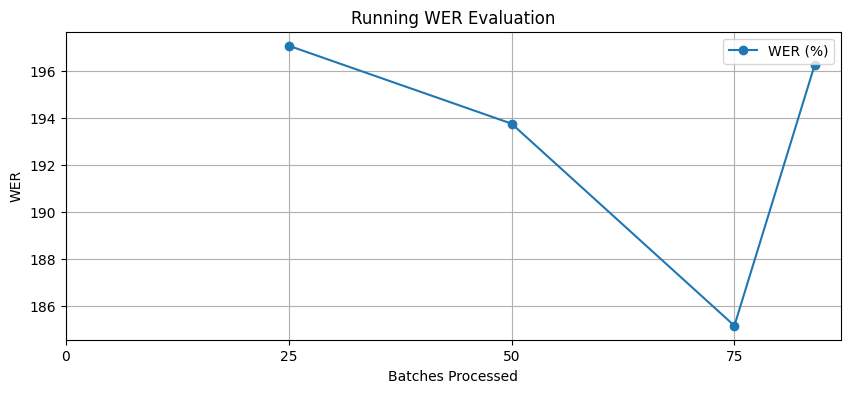

100%|██████████| 84/84 [17:28<00:00, 12.49s/it]


196.25445897740786

In [ ]:
# Evaluate WER before the training
torch.cuda.empty_cache()
# evaluation(model)
evaluation(model,resume=True)

In [ ]:
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small").to('cuda')
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

In [ ]:
#-----------------------------------Load and add LoRA model to base model-----------------------------------
from peft import LoraConfig, PeftModel, LoraModel, LoraConfig, get_peft_model

config = LoraConfig(r=32, lora_alpha=64, target_modules=["k_proj", "v_proj", "q_proj", "out_proj"], lora_dropout=0.05, bias="none")

model = get_peft_model(model, config)
model.print_trainable_parameters()
for n,p in model.named_parameters():
    print(n,p.requires_grad)

trainable params: 7,077,888 || all params: 248,812,800 || trainable%: 2.8447
base_model.model.base_model.model.base_model.model.model.encoder.conv1.weight False
base_model.model.base_model.model.base_model.model.model.encoder.conv1.bias False
base_model.model.base_model.model.base_model.model.model.encoder.conv2.weight False
base_model.model.base_model.model.base_model.model.model.encoder.conv2.bias False
base_model.model.base_model.model.base_model.model.model.encoder.embed_positions.weight False
base_model.model.base_model.model.base_model.model.model.encoder.layers.0.self_attn.k_proj.base_layer.weight False
base_model.model.base_model.model.base_model.model.model.encoder.layers.0.self_attn.k_proj.lora_A.default.weight True
base_model.model.base_model.model.base_model.model.model.encoder.layers.0.self_attn.k_proj.lora_B.default.weight True
base_model.model.base_model.model.base_model.model.model.encoder.layers.0.self_attn.v_proj.base_layer.weight False
base_model.model.base_model.mod

In [ ]:
#----------------------------Create Training Arguments------------------------------
from transformers import Seq2SeqTrainingArguments,EarlyStoppingCallback

training_args = Seq2SeqTrainingArguments(
    output_dir="lora-checkpoints",
    per_device_train_batch_size=2,  # Reduced from 8 to 2
    per_device_eval_batch_size=2,  # Reduced from 8 to 2
    gradient_accumulation_steps=2,  # Helps with small batch size
    # learning_rate=2e-5, (High)
    learning_rate=1e-5,  #(Medium)
    # learning_rate=5e-6,  #(Low)
    warmup_steps=50,
    num_train_epochs=2,
    # evaluation_strategy="epoch",
    evaluation_strategy="steps",
    eval_steps=250,
    # save_strategy="epoch",
    save_strategy="steps",
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,  # Disabling to save memory
    metric_for_best_model="eval_loss",
    greater_is_better=False,
    fp16=True,  # Mixed precision enabled
    generation_max_length=128,
    logging_steps=25,
    remove_unused_columns=False,
    label_names=["labels"],

    # Add AdamW optimizer and related arguments
    optim="adamw_torch",  # AdamW optimizer from PyTorch
    weight_decay=0.01,  # Regularization to prevent overfitting
    adam_epsilon=1e-8,   # Epsilon for numerical stability
    max_grad_norm=1.0,   # Gradient clipping
    # TensorBoard logging
    logging_dir="./lora-tensorboard",  # Directory for TensorBoard logs
    report_to="tensorboard",  # Enables logging to TensorBoard
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
#--------------------------------Create Trainer--------------------------------------
from transformers import Seq2SeqTrainer

# Use only 10% of the test dataset for evaluation
# eval_sample = bangla_dataset["test"].shuffle(seed=42).select(range(int(0.1 * len(bangla_dataset["test"]))))

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=bangla_dataset["train"],
    eval_dataset=bangla_dataset["test"],
    data_collator=data_collator,
    #compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)
model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
model.gradient_checkpointing_enable() #Gradient checkpointing helps save memory by recomputing activations during the backward pass.

In [ ]:
#-------------------Code for Cleaning GPU Cache--------------------------
# import torch
# import gc

# gc.collect()  # Clean up RAM
# torch.cuda.empty_cache()  # Free GPU memory

# print("✅ GPU memory forcibly cleared!")


✅ GPU memory forcibly cleared!


In [ ]:
#----------------Code to check stored huggingface dataset files in cache---------------
# !ls -lh ~/.cache/huggingface/datasets

total 4.0K
drwxr-xr-x 3 root root 4.0K Mar 17 21:31 imonghose___bengali-asr-data
-rw-r--r-- 1 root root    0 Mar 17 21:36 _root_.cache_huggingface_datasets_imonghose___bengali-asr-data_default_0.0.0_3a297ddede51b3012d3a6eb39e9dbea12b8ccc40.lock


In [ ]:
#--------------------Login to Huggingface (if required)-----------------------------------
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
#-------------------Check if a checkpoint file exists-----------------------
# ls -lh checkpoints/checkpoint-1197
# checkpoint_path = get_last_checkpoint("checkpoints")
# checkpoint_path

In [ ]:
torch.cuda.empty_cache()

In [ ]:
#-------------------------------Start Training with support for checkpointing--------------------------
from transformers import AutoModelForSeq2SeqLM, AutoModelForCausalLM, Trainer
from transformers.trainer_utils import get_last_checkpoint
from transformers import WhisperForConditionalGeneration


checkpoint_path = get_last_checkpoint("lora-checkpoints")

if checkpoint_path is not None:
    print(f"Resuming training from checkpoint: {checkpoint_path}")
    peft_base_model = get_peft_model(WhisperForConditionalGeneration.from_pretrained("openai/whisper-small"), config)
    loaded_model_from_checkpoint = PeftModel.from_pretrained(peft_base_model, checkpoint_path).to('cuda')
    model = loaded_model_from_checkpoint
    trainer.model = model  # Load the trained model into the trainer
    trainer.train(resume_from_checkpoint=checkpoint_path)  # Resume training
else:
    print("No checkpoint found, starting from scratch.")
    torch.cuda.empty_cache()
    trainer.train()  # Start training from scratch

No checkpoint found, starting from scratch.


/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Step,Training Loss,Validation Loss
250,1.652000,1.611107
500,1.315900,1.294994
750,1.097200,1.078350
1000,0.958700,0.960913
1250,0.887900,0.896499
1500,0.837400,0.870930


/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


In [ ]:
# --------------------------Save LoRa adaptors to "trained_model" directory---------------------------
trainer.save_model("lora_trained_model")

In [ ]:
import ast
import matplotlib.pyplot as plt

# === Paths to your log files ===
train_log_file = "LoRA_training_logs.txt"       # Training loss logs (step-level)
eval_log_file = "LoRA_evaluation_logs.txt"            # Eval loss logs (epoch-level)

# === Read and parse training log ===
train_data = []
with open(train_log_file, 'r') as f:
    for line in f:
        if line.strip():
            log_entry = ast.literal_eval(line.strip())
            train_data.append(log_entry)

# Extract training epochs and losses
train_epochs = [entry['epoch'] for entry in train_data]
train_losses = [entry['loss'] for entry in train_data]

# === Read and parse evaluation log ===
eval_data = []
with open(eval_log_file, 'r') as f:
    for line in f:
        if line.strip():
            log_entry = ast.literal_eval(line.strip())
            eval_data.append(log_entry)

# Extract evaluation epochs and losses
eval_epochs = [entry['epoch'] for entry in eval_data]
eval_losses = [entry['eval_loss'] for entry in eval_data]

# === Plot both training and evaluation loss curves ===
plt.figure(figsize=(10, 6))

# Training loss: blue with small circles
plt.plot(train_epochs, train_losses, linestyle='-', marker='o', markersize=4, label='Training Loss', color='blue')

# Evaluation loss: orange with square markers
plt.plot(eval_epochs, eval_losses, linestyle='-', marker='s', markersize=6, label='Evaluation Loss', color='orange')

# Labels, title, legend, etc.
plt.title("Training vs Evaluation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


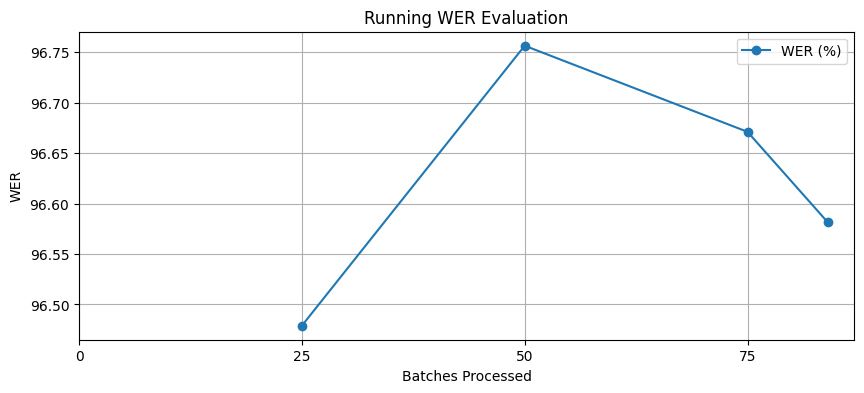

100%|██████████| 84/84 [07:33<00:00,  5.40s/it]


96.58145065398335

In [ ]:
# Evaluate WER after the training
torch.cuda.empty_cache()
evaluation(trainer.model, resume=True)

In [ ]:
#----------------------------Load LoRA adaptors from "trained_model" directory and add it to base model to reload---------------------------
from transformers import WhisperForConditionalGeneration
from peft import PeftModel
import torch

# Load base model
base_model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")

loaded_model = get_peft_model(base_model, config)

# Load LoRA adapter
loaded_model = PeftModel.from_pretrained(loaded_model, "lora_trained_model")

# ✅ Move model to GPU
loaded_model = loaded_model.to("cuda")



/usr/local/lib/python3.11/dist-packages/peft/peft_model.py:599: UserWarning: Found missing adapter keys while loading the checkpoint: ['base_model.model.base_model.model.model.encoder.layers.0.self_attn.k_proj.lora_A.default.weight', 'base_model.model.base_model.model.model.encoder.layers.0.self_attn.k_proj.lora_B.default.weight', 'base_model.model.base_model.model.model.encoder.layers.0.self_attn.v_proj.lora_A.default.weight', 'base_model.model.base_model.model.model.encoder.layers.0.self_attn.v_proj.lora_B.default.weight', 'base_model.model.base_model.model.model.encoder.layers.0.self_attn.q_proj.lora_A.default.weight', 'base_model.model.base_model.model.model.encoder.layers.0.self_attn.q_proj.lora_B.default.weight', 'base_model.model.base_model.model.model.encoder.layers.0.self_attn.out_proj.lora_A.default.weight', 'base_model.model.base_model.model.model.encoder.layers.0.self_attn.out_proj.lora_B.default.weight', 'base_model.model.base_model.model.model.encoder.layers.1.self_attn.k

In [ ]:
#-----------------------Alternative : Save full model to disk in "merged_full_model" directory---------------------------
# merged_full_model = trainer.model.merge_and_unload()  # merges LoRA into base model
# merged_full_model.save_pretrained("merged_full_model")  # now contains full model weights

#-------------------------------Reload the full model from local "merged_full_model" directory------------------------------------
# from transformers import WhisperForConditionalGeneration
# merged_full_model = WhisperForConditionalGeneration.from_pretrained("merged_full_model")
# # ✅ Move model to GPU
# merged_full_model = merged_full_model.to("cuda")



In [ ]:
#-------------------------------Save the loaded model to hugging face------------------------
from transformers import WhisperForConditionalGeneration

# Push to Hugging Face Hub
loaded_model.push_to_hub("raghavab/telugu-asr-small-lora-test")



adapter_model.safetensors:   0%|          | 0.00/28.4M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/raghavab/telugu-asr-small-lora-test/commit/2982fcda3cee3880754d7085575546053030c13c', commit_message='Upload model', commit_description='', oid='2982fcda3cee3880754d7085575546053030c13c', pr_url=None, repo_url=RepoUrl('https://huggingface.co/raghavab/telugu-asr-small-lora-test', endpoint='https://huggingface.co', repo_type='model', repo_id='raghavab/telugu-asr-small-lora-test'), pr_revision=None, pr_num=None)

In [ ]:
#---------------------------------Reload the model from Hugging Face Hub-----------------------------------
# Load base model
base_model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")

peft_model = get_peft_model(base_model, config)
# loaded_model = get_peft_model(loaded_model, "trained_model")

# Load LoRA adapter
final_loaded_model = PeftModel.from_pretrained(peft_model, "raghavab/telugu-asr-small-lora-test")

# ✅ Move model to GPU
final_loaded_model = final_loaded_model.to("cuda")


adapter_config.json:   0%|          | 0.00/800 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/28.4M [00:00<?, ?B/s]

In [ ]:
#------------------------------Check true vs prediction on few sentences after fine-tuning (using trainer.model)------------------
import torch

for idx in range(7,10):
    # Get the tokenized target labels
    target_tokenized = bangla_dataset["train"][idx]["labels"]

    # Decode the true text from tokenized format
    target_text = tokenizer.decode(target_tokenized, skip_special_tokens=True)

    # Convert input features to tensor and add batch dimension
    input_feature = torch.tensor(bangla_dataset["train"][idx]["input_features"]).unsqueeze(0)

    # Ensure correct data type and move to GPU
    input_feature = input_feature.to(dtype=torch.float32, device='cuda')  # Use float16 if needed

    with torch.no_grad():
        op = trainer.model.generate(input_feature, language='telugu', task='transcribe')

    # Decode predicted text
    text_pred = tokenizer.batch_decode(op, skip_special_tokens=True)[0]

    print(f'-------{idx}------')
    print(f'True : {target_text} \nPred : {text_pred}')
    print('\n ')


-------7------
True : అనగా మన దేశానికి హిందీ అధికార భాష\n 
Pred : అనగం మనదయసానికి మందిగారవాసా

 
-------8------
True : ఈ సందర్భంలో ఒక కథ చెప్తాను 
Pred : ఈ సందరమంలో కక చపటాంతు

 
-------9------
True : జానకి రచన జి 
Pred : జానక్రిచనా చేంగ్ల్ల్

 


In [ ]:
#------------------------------Check true vs prediction on few sentences after fine-tuning (using model loaded from local i.e "trained_model")------------------
import torch

for idx in range(7,10):
    # Get the tokenized target labels
    target_tokenized = bangla_dataset["train"][idx]["labels"]

    # Decode the true text from tokenized format
    target_text = tokenizer.decode(target_tokenized, skip_special_tokens=True)

    # Convert input features to tensor and add batch dimension
    input_feature = torch.tensor(bangla_dataset["train"][idx]["input_features"]).unsqueeze(0)

    # Ensure correct data type and move to GPU
    input_feature = input_feature.to(dtype=torch.float32, device='cuda')  # Use float16 if needed

    with torch.no_grad():
        op = loaded_model.generate(input_feature, language='telugu', task='transcribe')

    # Decode predicted text
    text_pred = tokenizer.batch_decode(op, skip_special_tokens=True)[0]

    print(f'-------{idx}------')
    print(f'True : {target_text} \nPred : {text_pred}')
    print('\n ')


-------7------
True : అనగా మన దేశానికి హిందీ అధికార భాష\n 
Pred :  अनगा मन देसानके हिंदी अदिखार भाशा

 
-------8------
True : ఈ సందర్భంలో ఒక కథ చెప్తాను 
Pred :  इस अंदर्बम लोग के कत चप्तानु

 
-------9------
True : జానకి రచన జి 
Pred :  जानकी रच्चना जी

 


In [ ]:
#------------------------------Check true vs prediction on few sentences after fine-tuning (using model loaded from hugging face)------------------
import torch

for idx in range(7,10):
    # Get the tokenized target labels
    target_tokenized = bangla_dataset["train"][idx]["labels"]

    # Decode the true text from tokenized format
    target_text = tokenizer.decode(target_tokenized, skip_special_tokens=True)

    # Convert input features to tensor and add batch dimension
    input_feature = torch.tensor(bangla_dataset["train"][idx]["input_features"]).unsqueeze(0)

    # Ensure correct data type and move to GPU
    input_feature = input_feature.to(dtype=torch.float32, device='cuda')  # Use float16 if needed

    with torch.no_grad():
        op = final_loaded_model.generate(input_feature, language='telugu', task='transcribe')

    # Decode predicted text
    text_pred = tokenizer.batch_decode(op, skip_special_tokens=True)[0]

    print(f'-------{idx}------')
    print(f'True : {target_text} \nPred : {text_pred}')
    print('\n ')


-------7------
True : అనగా మన దేశానికి హిందీ అధికార భాష\n 
Pred :  अनगा मन देसानके हिंदी अदिखार भाशा

 
-------8------
True : ఈ సందర్భంలో ఒక కథ చెప్తాను 
Pred :  इस अंदर्बम लोग के कत चप्तानु

 
-------9------
True : జానకి రచన జి 
Pred :  जानकी रच्चना जी

 
